In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('weatherAUS.csv')

In [37]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [41]:
def Utility_function() :
   # Finds country with most number of entries 
   Utility = ((data["Location"].value_counts() / data.shape[0])).head(1)
   if data.dtypes["Location"] == np.object:
     data["Location"].value_counts().plot(kind="bar", color = 'g')
     plt.figure(1, figsize=(15,7))
        
   return Utility  

PLoting a graph for high density rainfall 

Most native country is: Canberra    0.024038
Name: Location, dtype: float64


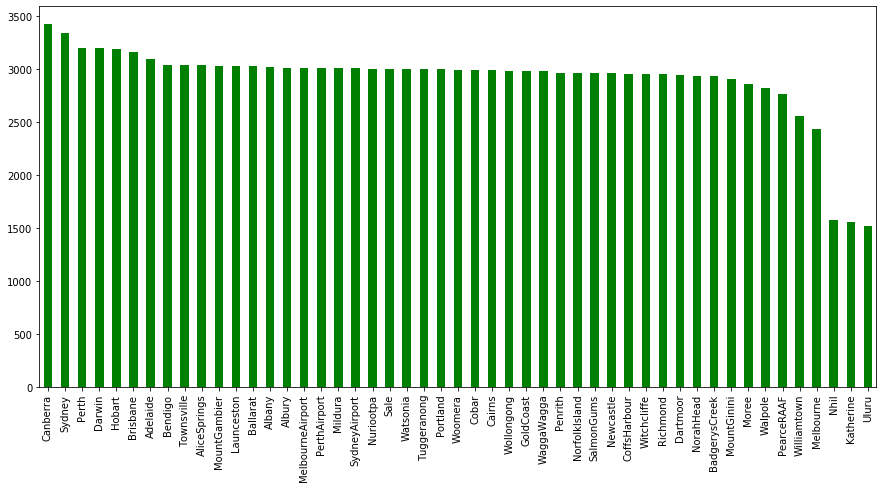

In [39]:
#Call Utility function()
utility = Utility_function()  
#plt.rcParams["figure.figsize"] = [15,7]
print ("Most native country is:", utility)  

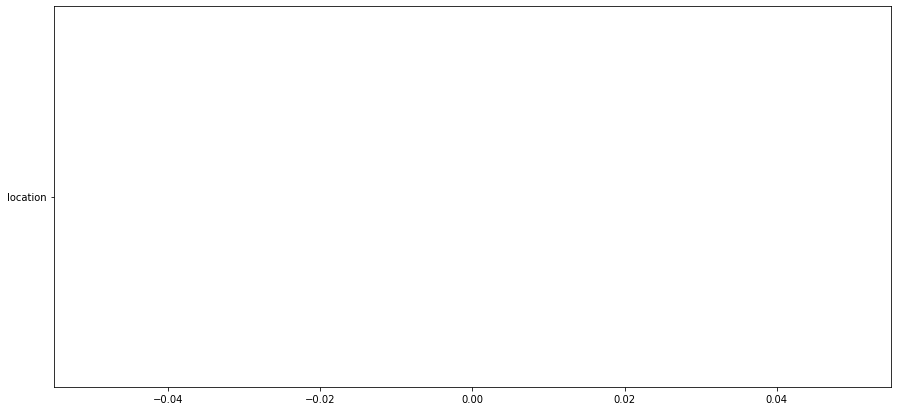

In [40]:
plt.rcParams["figure.figsize"] = [15,7]
plt.plot("location", )

In [17]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings("ignore")


In [18]:
df = pd.read_csv('ASX.csv', parse_dates = True)

In [19]:
df.head()

,Date,Open,High,Low,Close,Returns
0,02/07/2017 22:00:00,5712.969,5712.969,5712.969,5712.969,0.000000
1,02/07/2017 23:00:00,5712.969,5712.969,5712.969,5712.969,0.000000
2,03/07/2017 00:00:00,5715.970,5728.969,5701.969,5708.970,-0.000700
3,03/07/2017 01:00:00,5707.969,5722.970,5690.969,5720.970,0.002100
4,03/07/2017 02:00:00,5720.970,5727.970,5716.969,5721.969,0.000175


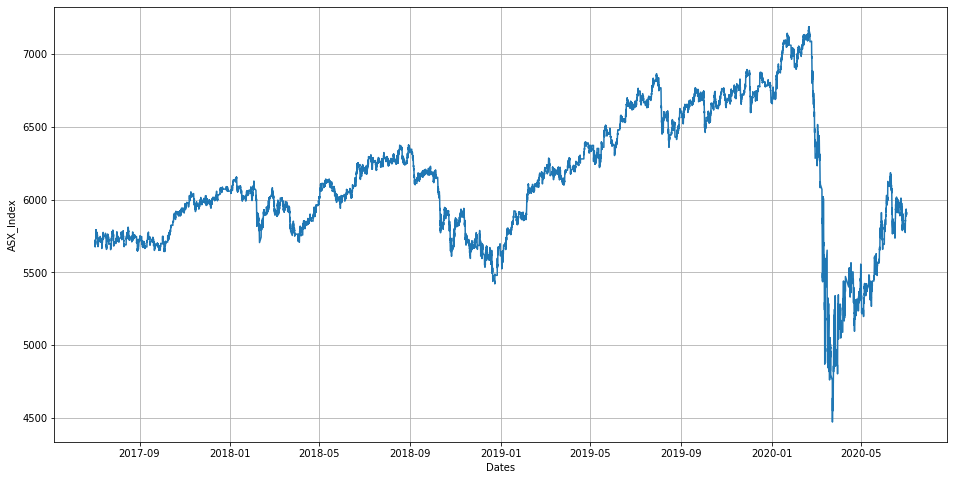

In [25]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y %H:%M:%S')
data = pd.read_csv('ASX.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
#data = data.loc['2012-11-10':'2017-11-10']
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('ASX_Index')
plt.plot(data['Close']);

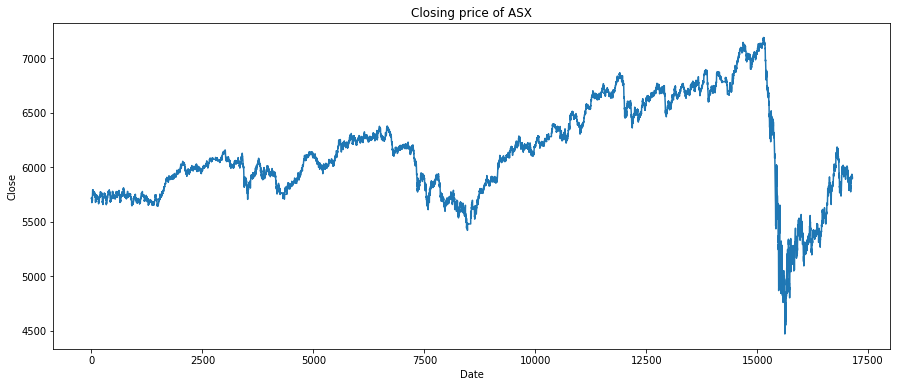

In [28]:
df["Close"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Closing price of ASX")
plt.show()

Ploting the closing price in histrogram 

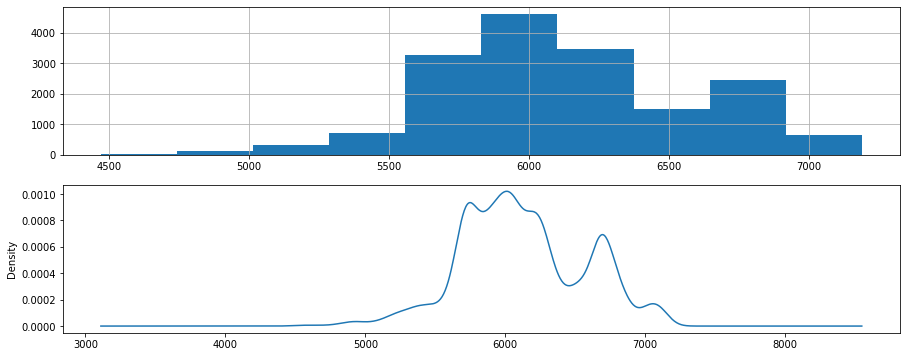

In [27]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["Close"].hist()
plt.subplot(212)
df["Close"].plot(kind='kde')
plt.show()

Dickey–Fuller test: p=0.306289


<Figure size 1080x504 with 0 Axes>

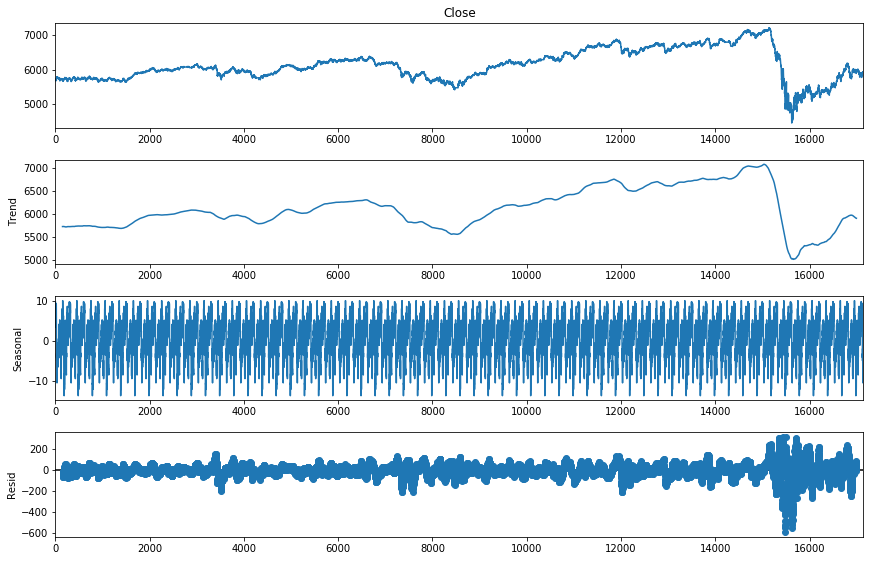

In [42]:
df_sd = seasonal_decompose(df.Close, freq=300)  
fig = plt.figure()  
fig = df_sd.plot()  
fig.set_size_inches(12, 8)

print("Dickey–Fuller test: p=%f" % adfuller(df.Close)[1])


In [51]:
df['diff_dji_box'] = df.Close - df.Close.shift(1)

print("Dickey–Fuller test: p=%f" % adfuller(df.diff_dji_box[1:])[1])


Dickey–Fuller test: p=0.000000


In [52]:
# Define the time-series evaluation function as follows:

def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true,y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    
# Here is the ADF test function to check for stationary data:

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value','No Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value 
        print (dfoutput)
        
        if dftest[1] <= 0.05:
            
            print("Conclusion:====>")
            print("Reject the null hypothesis")
            print("Data is stationary")
            
        else:
            print("Conclusion:====>")
            print("Fail to reject the null hypothesis")
            print("Data is non-stationary")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


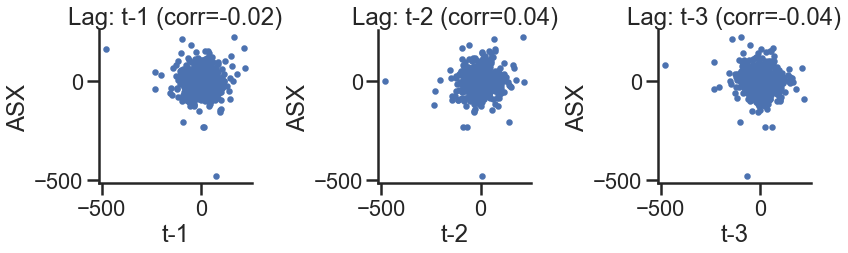

In [56]:
import seaborn as sns
# seaborn plotting style
sns.set(style='ticks', context='poster')

# Lag correlation formation of time series PSX_box_diff

lags=3

ncols=3
nrows=int(np.ceil(lags/ncols))

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))

for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
    lag_str = 't-{}'.format(lag)
    X = (pd.concat([df['diff_dji_box'], df['diff_dji_box'].shift(-lag)], axis=1,
                   keys=['y'] + [lag_str]).dropna())

    X.plot(ax=ax, kind='scatter', y='y', x=lag_str);
    corr = X.corr().values[0][1]
    ax.set_ylabel('ASX')
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
    ax.set_aspect('equal');
    sns.despine();

fig.tight_layout();

In [59]:
# Define the time-series evaluation function as follows:

def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true,y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    
# Here is the ADF test function to check for stationary data:

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value','No Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value 
        print (dfoutput)
        
        if dftest[1] <= 0.05:
            
            print("Conclusion:====>")
            print("Reject the null hypothesis")
            print("Data is stationary")
            
        else:
            print("Conclusion:====>")
            print("Fail to reject the null hypothesis")
            print("Data is non-stationary")

In [61]:
# We can see that Close is nonstationary, and auto-arima handles this internally.
Augmented_Dickey_Fuller_Test_func(df.Close,'Close')


Results of Dickey-Fuller Test for column: Close
Test Statistic                    -1.955786
p-value                            0.306289
No Lags Used                      42.000000
Number of Observations Used    17103.000000
Critical Value (1%)               -3.430732
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary
Test Statistic                    -1.955786
p-value                            0.306289
No Lags Used                      42.000000
Number of Observations Used    17103.000000
Critical Value (1%)               -3.430732
Critical Value (5%)               -2.861709
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary
Test Statistic                    -1.955786
p-value                            0.306289
No Lags Used                      42.000000
Number of Observations Used    17103.000000
Critical Value (1%)               -3.430732
Critical Value (5%)               -2.861709
Critical Value (10%)    

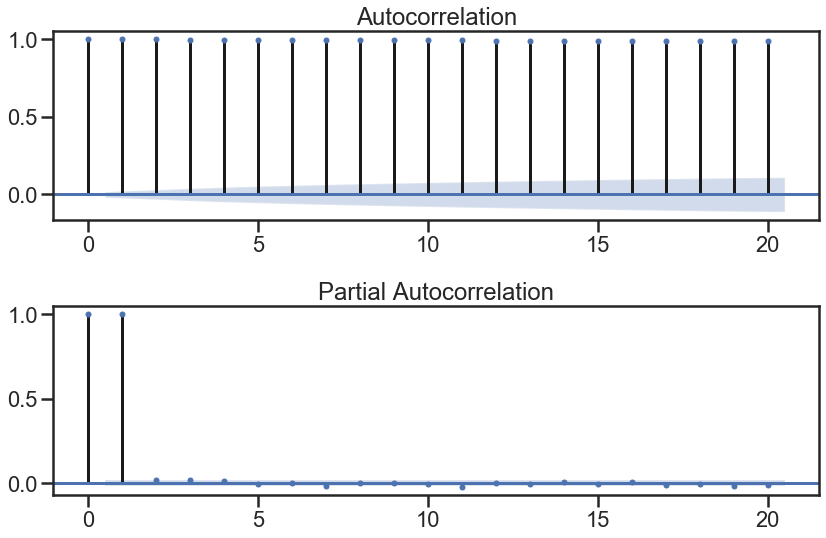

In [65]:
# Checking for Auto-correlation and Partial auto-correlation
X = df[['Close' ]]
train, test = X[0:-5144], X[-5144:]

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=20, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout();

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout();
